<a href="https://colab.research.google.com/github/Joriswillems/socioPhysicsTUe/blob/master/Elementary_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Elementary Cellular Automata
An elementary cellular automaton is a grid of cells that can be in two states (1 and 0). The update follows a set of rules based on the state of the neighboring cells. 
Since there are 8 possible binary states, for a neighborhood (three cells neighboring a given cell), there are 256 different cellular automata.
Each rule is indexed with an 8-bit binary number.
It is a powerful tool used to describe the behaviour of discrete complex systems.
Cellular automata can be used as template to simulate a variety of real systems, from biology to climate Physics reaching even quantum mechanics (The Cellular Automaton Interpretation of Quantum Mechanics, Gerardus't Hooft).
The most famous rule is called "The Game of Life", designed by the mathematician John Conway (https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life).
This example is remarkable because it shows how, despite the extreme simplicity of the local rule, the longtime behavior of the configurations is unpredictable.
In this notebook it will be presented a simple simulation of a system where the rule is given as an input.

For more information about this topic, check https://www.cs.tau.ac.il/~nachumd/models/CA.pdf.

 Let us start importing the needed libraries and initializing our grid by giving as input the number of steps and cells.


 **ADD LINK TO THE MANUAL!!**

In [ ]:
# This code simulates elementary CAs
# It prints a space-time plot of the CA behaviour

import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [ ]:
print('Enter the number of cells:')
ncells = int(input())
print('Enter the number of time steps:')
ntsteps = int(input())

Enter the number of cells:
50
Enter the number of time steps:
50


In [ ]:
grid = np.zeros([ntsteps, ncells + 2])  # T x n grid (matrix) of zeros (white cells)
grid[0, :] = rd.choices([0, 1], k=(ncells + 2))  # random first row with 50% chance of either 0 or 1
#grid[0, :] = np.ones((ncells+2,), dtype=int) # first row of ones
#grid[0, :] = np.zeros((ncells+2,), dtype=int) # first row of zeros

The list "grid" represents our entire grid and the first column is given by a succession of ncells elements in a random state (the possible states are 0 and 1). 
Let us print the grid with only the first row filled.

In [ ]:
print(grid)



[[0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


By using the next cell, we can give as an input the number of the Rule that we want to simulate, that will be converted in binary code.

In [ ]:
print('Enter the rule:')
r = int(input())
chosenrule = [int(x) for x in np.binary_repr(r, width=8)]

Enter the rule:
30


In [ ]:
print(chosenrule)

[0, 0, 0, 1, 1, 1, 1, 0]


Given now the rule in binary code, we can perform the two for loops over the cells and the timesteps.
The index i represents the generation of cells, the index j the time step and the update is depending on the chosen rule.


In [ ]:
# The time loop
for i in np.arange(0, ntsteps - 1):  # for each row of the grid (minus first row)
  for j in np.arange(0, ncells): 
    k = int("".join(str(int(x)) for x in grid[i, j:j + 3]), 2)
    grid[i + 1, j + 1] = chosenrule[7 - k]
density = np.count_nonzero(grid)/ ncells

In the last line we also evaluated and saved the density of the grid, defined as the fraction of cells of the final configuration that have a value of 1.
Now it is possible to print the complete system and observe the interesting emergent behaviour.

In [ ]:
print(density)

24.4


In [ ]:
print(grid)

[[0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


Text(0, 0.5, 't [iteration]')

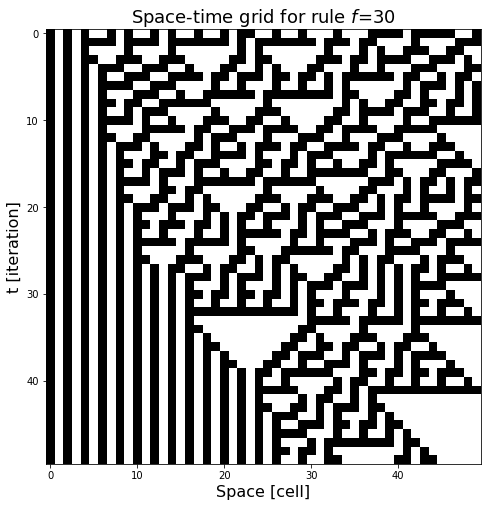

In [ ]:
#Plot the space-time diagram
#plt.matshow(grid, cmap = 'Greys')
#plt.show()
plt.figure(1, figsize=[8, 8])
plt.imshow(grid[:, 1:ncells + 1], cmap="Greys", interpolation="nearest")
plt.title("Space-time grid for rule $f$=%d" % (r), fontsize=18)
plt.xlabel("Space [cell]", fontsize=16)
plt.ylabel("t [iteration]", fontsize=16)

Cellular automata are also used to model pedestrians and crowd dynamics with very low computational costs.
An example can be found in https://www-sciencedirect-com.proxy.library.uu.nl/science/article/pii/S0378437101001418 .
